# <center>Interactive Graphs</center>
It is instructive to see how graphs change when its parameters vary.  However, it can become quite annoying to have to edit the code every time you want to make a change.  It is often more convenient, and more illuminating, to be able to vary the parameters continuously.  That lets you watch the situation vary in real time.

Start with the graph of the potential of a uniformly charged sphere.  This is a copy of code you've already seen.

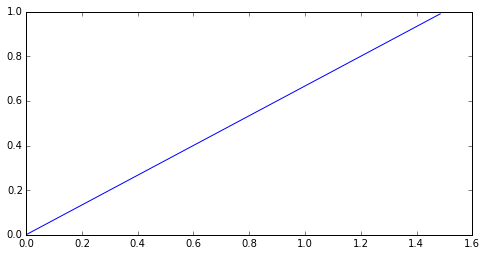

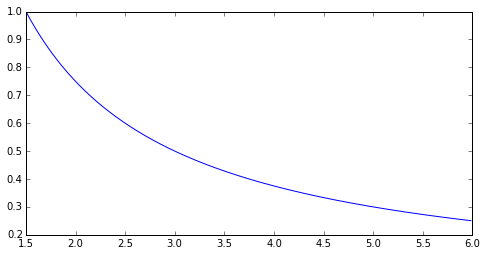

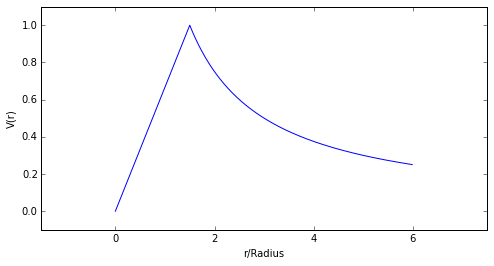

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Display the plots inline (ie, here).
%matplotlib inline                     
mpl.rcParams['figure.figsize']=[8,4]  # Set H and V sizes of plots.


import numpy as np

# Set up the radial steps.  
Radius    = 1.5          # The radius of the sphere
rfraction = 0.01         # Make each step 1% of the radius.
rstep     = rfraction*Radius
rmax      = 4*Radius

# Define the potential function.
def potential(r,R):
    if  r > R:
        return R/r
    else:
        return r/R

# The r < Radius part of the graph:
# range requires insteps (the # steps to take) to be an integer.
insteps   = int(Radius/rstep) 
xin = [i*rstep                    for i in range(0,insteps)]
yin = [potential(i*rstep, Radius) for i in range(0,insteps)]

# Plot the r < Radius part.
plt.plot(xin,yin)
plt.show()

# The r > Radius part of the graph.  xout starts at r = Radius.
rmax     = 4*Radius
outsteps = int((rmax-Radius)/rstep)
xout = [(i+insteps)*rstep                    for i in range(0,outsteps)]
yout = [potential((i+insteps)*rstep, Radius) for i in range(0,outsteps)]

# Plot the r > Radius part.
plt.plot(xout,yout)
plt.show()

# Put the two parts together.
# Merging lists is simple - just add them!
# Now, we can plot a function that has a cusp!!
x2 = xin + xout
y2 = yin + yout
plt.ylabel("V(r)")
plt.xlabel("r/Radius")
# Set the plot limits to leave some white space around the graph.
plt.xlim(-Radius,5*Radius)
plt.ylim(-0.1,1.1)
plt.plot(x2,y2)
plt.show()

### Changing the plot on the fly, without editing code.

Let's make use of another library `iPython.html.widgets`, which enables interactive functionality.  Let'start  by plotting the `sin` function, varying the frequency and amplitude on the fly.  The `interact` function automatically builds a user interface for exploring the plot_sine function using sliders to adjust the parameters. This code is adapted from an [example](http://www.nature.com/news/ipython-interactive-demo-7.21492?article=1.16261) provided by *Nature* magazine. 

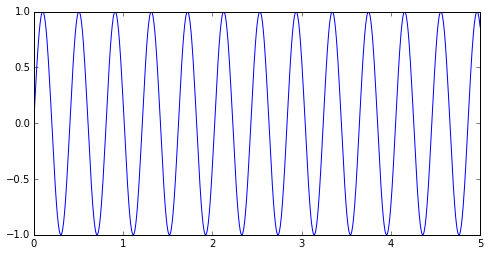

None

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact

# We have defined default values for the parameters.  This determines 
# where the sliders will be positioned when you first start.
# If you invoke plot_sine without specifying any parameters, 
# e.g., plot_sine(), you'l see the same as if you do plot_sine(4,1,6,1000). 
def plot_sine(frequency=4.0, amplitude=1.0, xmax=6, npoints=1000):
   
    # Integer arithmetic truncates fractions, so we must tell Python 
    # one of the quantities is "float" (non-integer) before dividing.
    xstep = float(xmax)/(npoints-1)
    x = [i*xstep                             for i in range(0,npoints)]
    y = [amplitude*np.sin(frequency*i*xstep) for i in range(0,npoints)]

    plt.plot(x,y)
    plt.show()

# interact lets us change the parameters of plot_sine on the fly, 
# using sliders.
interact(plot_sine, frequency  = (1.0, 22.0, 0.5), 
                    amplitude  = (1, 5, 1),
                    xmax       = (1,20,1),
                    npoints    = (50,1000,50))

### An interesting sidelight, for those who will take real data.

Set `xmax` to 10 or higher.  Notice what happens when you turn the frequency way up and the number of points way down.  The plot of the data no longer looks like a nice sine wave.  This kind of problem, called "aliasing", arises when the spacing of the data points (`xstep` in the code) is comparable to, or larger than, the period of oscillation.  When doing experiments that involve taking discrete data points, you must beware of this effect.  This is an illustration of the [Nyquist-Shannon theorem](http://whatis.techtarget.com/definition/Nyquist-Theorem).

### Study the behavior of the "charged sphere potential.

Look at this code.  It lets us vary the radius and the total charge of the charged sphere.

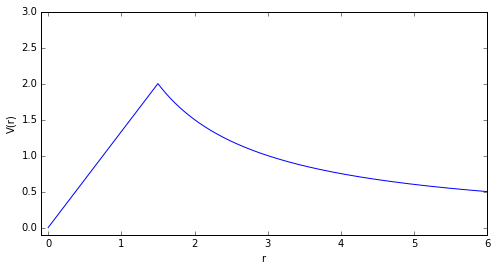

None

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

# Define the potential function.
def potential(Q, R, r):
    if  r > R:
        return Q/r
    else:
        return Q*r/R**2

# We have defined default values for the parameters.  This determines 
# where the sliders will be positioned when you first start.
def plotpot(Qtot=2.0, Radius=1.0):
   
    # Integer arithmetic truncates fractions, so we must tell Python 
    # one of the quantities is "float" (non-integer) before dividing.
    rmax = 10.0
    rstep = rmax/1000
    r = [i*rstep                            for i in range(0,1000)]
    pot = [potential(Qtot, Radius, i*rstep) for i in range(0,1000)]

    # Set the plot limits to prevent rescaling when we change parameters.
    plt.xlim(-0.1, 6)
    plt.ylim(-0.1, 3)
    
    plt.ylabel("V(r)")
    plt.xlabel("r")

    plt.plot(r,pot)
    plt.show()

# interact lets us change the parameters on the fly, using sliders.
interact(plotpot, Qtot   = (1.0, 3, 0.5), 
                  Radius = (0.5, 5, 0.5))

You should see that for `r > Radius`, the potential depends only on `Qtot`.  At `r < Radius`, the potential changes more rapidly when `Radius` is smaller, because the charge density is higher.